In [473]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import lines
import math
import os
from scipy import signal
import librosa
%matplotlib inline

## Sounds

In [474]:
path = os.getcwd() + '/coinsounds'
coin_data = {}
for filename in os.listdir(path):
    if filename=='.DS_Store':
        continue
    coin_data[os.path.splitext(filename)[0]] = librosa.load(path +'/'+ filename, sr=44000)

## Spectrograms

In [440]:
def Spectro(filename):
    # Load the audio as a waveform `y`
    # Store the sampling rate as `sr`
    y, sr = librosa.load(filename)
    D = librosa.stft(y) # short time fourier trans
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time')
#     plt.title("Power Spectrogram: " + filename)
#     plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()

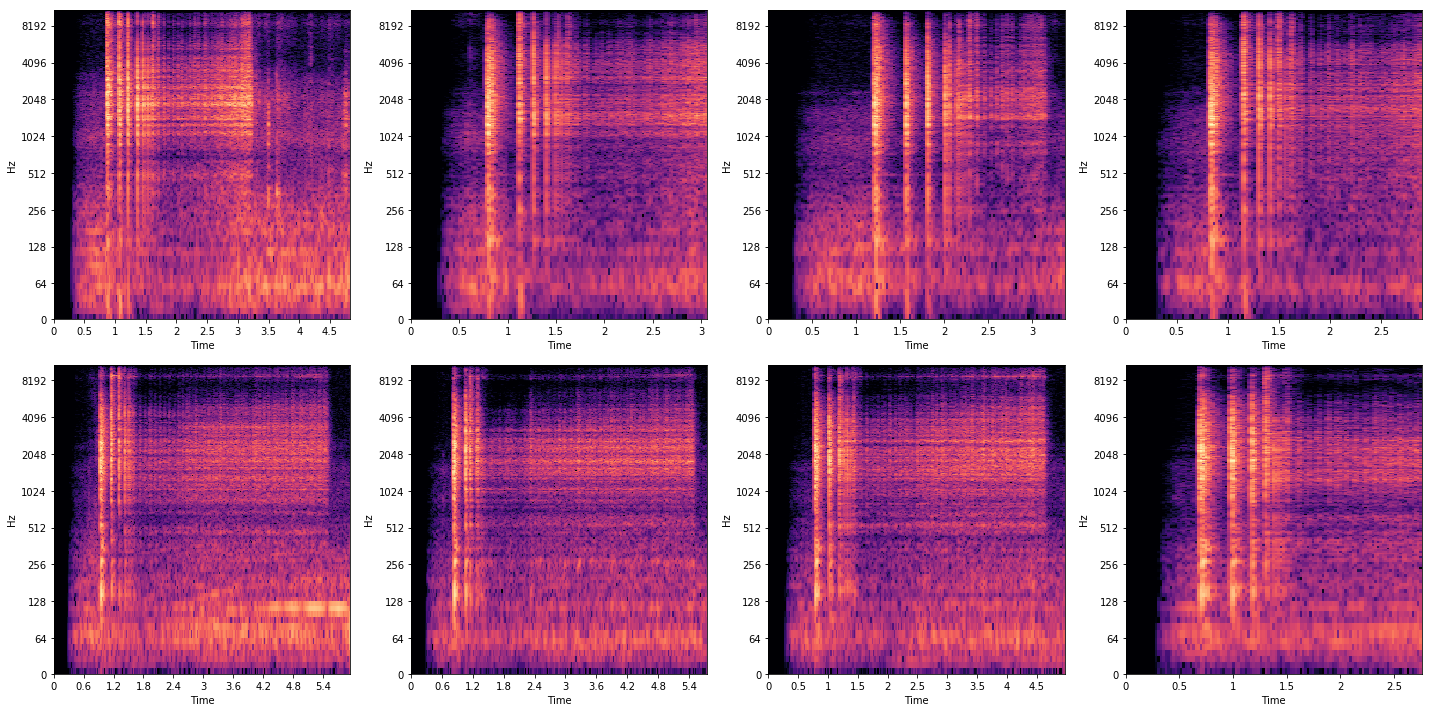

In [427]:
fig, ax = plt.subplots(figsize=(20,10))
plt.subplot(2, 4, 1)
Spectro(path+'/'+'P1.m4a')
plt.subplot(2, 4, 2)
Spectro(path+'/'+'P2.m4a')
plt.subplot(2, 4, 3)
Spectro(path+'/'+'P3.m4a')
plt.subplot(2, 4, 4)
Spectro(path+'/'+'P4.m4a')
plt.subplot(2, 4, 5)
Spectro(path+'/'+'Q1.m4a')
plt.subplot(2, 4, 6)
Spectro(path+'/'+'Q2.m4a')
plt.subplot(2, 4, 7)
Spectro(path+'/'+'Q3.m4a')
plt.subplot(2, 4, 8)
Spectro(path+'/'+'Q4.m4a')

## Amp v. Time

In [401]:
y, sr = librosa.load(path+'/'+'P1.m4a')
y.shape

(106464,)

In [402]:
print "length of file = {}s".format(y.shape[0]/float(sr))

length of file = 4.82829931973s


In [404]:
# create array for time and scale to milliseconds
time_array = np.arange(0, y.shape[0], 1)
time = time_array/float(sr) * 1000 

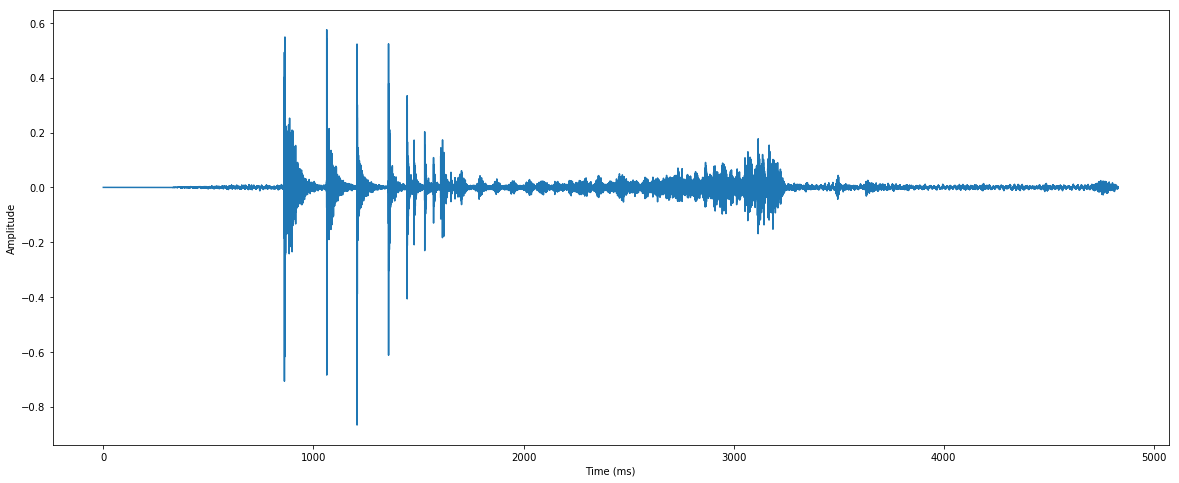

In [405]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, y);
ax.set_ylabel('Amplitude');
ax.set_xlabel('Time (ms)');

## Power Spectrum

The fourier transform of the tone returned by the fft function contains both magnitude and phase information and is given in a complex representation (i.e. returns complex numbers). By taking the absolute value of the fourier transform we get the information about the magnitude of the frequency components.

In [441]:
def PowerSpect(y, sr, sample_length):
    y = y[:sample_length]
    n = len(y) 
    p = fft(y) # take the fourier transform 

    nUniquePts = int(math.ceil((n+1)/2.0))
    p = p[0:nUniquePts]
    p = abs(p)

    p = p / float(n) # scale by the number of points so that the magnitude does not depend on the length 
                     # of the signal or on its sampling frequency  
    p = p**2  # square it to get the power 

    # odd nfft excludes Nyquist point
    if n % 2 > 0: # we've got odd number of points fft
        p[1:len(p)] = p[1:len(p)] * 2
    else:
        p[1:len(p) -1] = p[1:len(p) - 1] * 2 # we've got even number of points fft
    freqArray = np.arange(0, nUniquePts, 1.0) * (float(sr) / n);


    
    return freqArray/1000, 10*np.log10(p)

## Coin Test

In [501]:
#find shortest recording to use for sample length
len(min(coin_data.items(), key=lambda x:len(x[1][0]))[1][0])

94747

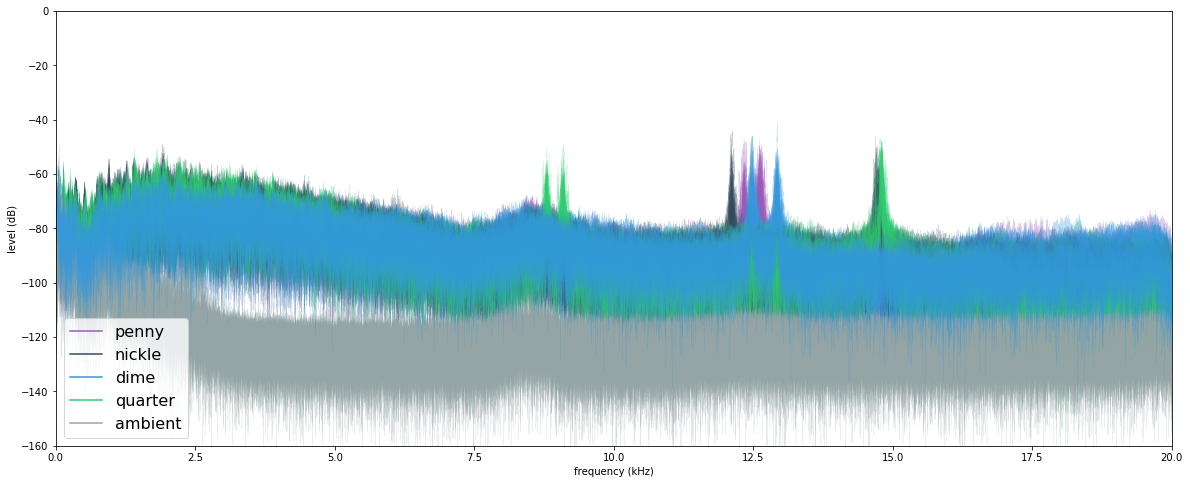

In [502]:
fig, ax = plt.subplots(figsize=(20,8))
for sample in coin_data.keys():
    khz, db = PowerSpect(coin_data[sample][0], coin_data[sample][1], 94000)
    if sample[0] == 'P':
        plt.plot(khz, db, label='penny', color = "#9b59b6", linewidth=.3, alpha=.3) #purple
    elif sample[0] == 'N':
        plt.plot(khz, db, label='nickle', color = "#34495e", linewidth=.3, alpha=.3) #dark blue
    elif sample[0] == 'D':
        plt.plot(khz, db, label='dime', color = "#3498db", linewidth=.3, alpha=.3)  #light blue
    elif sample[0] == 'Q':
        plt.plot(khz, db, label='quarter', color = "#2ecc71", linewidth=.3, alpha=.3) #green
    else:
        plt.plot(khz, db, label='ambient', color = "#95a5a6", linewidth=.3, alpha=.3) #grey

purple_line = lines.Line2D([], [], color="#9b59b6",markersize=100, label='penny')
dblue_line = lines.Line2D([], [], color="#34495e", markersize=100, label='nickle')
lblue_line = lines.Line2D([], [], color="#3498db", markersize=100, label='dime')
green_line = lines.Line2D([], [], color="#2ecc71", markersize=100, label='quarter')
grey_line = lines.Line2D([], [], color="#95a5a6", markersize=100, label='ambient')


handles = [purple_line,dblue_line, lblue_line, green_line, grey_line]
labels = [h.get_label() for h in handles] 
plt.legend(handles=handles, labels=labels, loc="lower left", prop={'size': 16});
plt.xlim([0,20])
plt.ylim([-160, 0])
plt.xlabel('frequency (kHz)');
plt.ylabel('level (dB)');

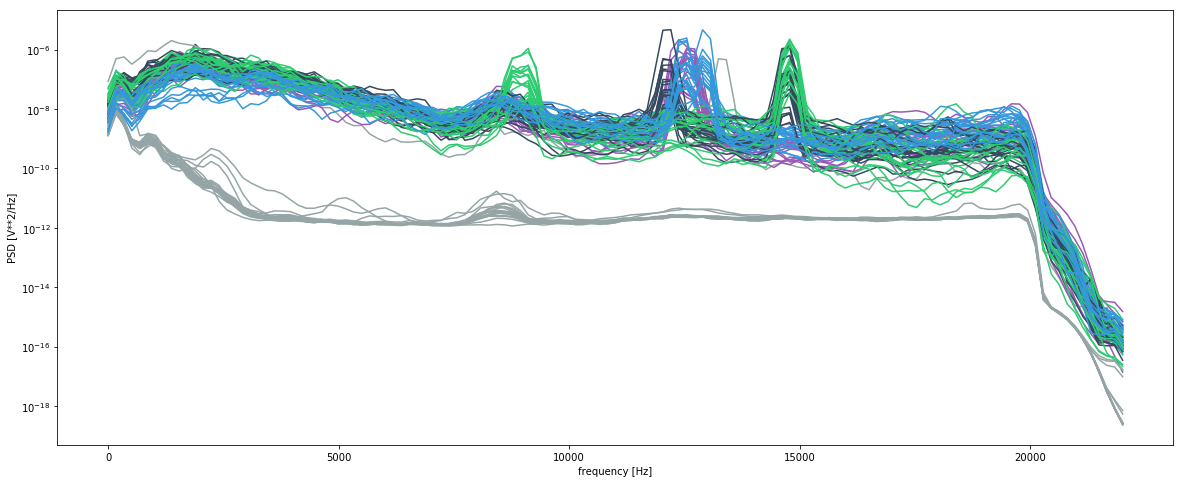

In [456]:
fig, ax = plt.subplots(figsize=(20,8))
for sample in coin_data.keys():
    f, Pxx_den = signal.welch(coin_data[sample][0], coin_data[sample][1])
    if sample[0] == 'P':
        plt.semilogy(f, Pxx_den, color="#9b59b6") #purple
    elif sample[0] == 'N':
        plt.semilogy(f, Pxx_den, color="#34495e") #dark blue
    elif sample[0] == 'D':
        plt.semilogy(f, Pxx_den, color="#3498db") #light blue
    elif sample[0] == 'Q':
        plt.semilogy(f, Pxx_den, color="#2ecc71") #green
    else:
        plt.semilogy(f, Pxx_den, color="#95a5a6") #grey
        
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')